In [2]:
import pvxarray
import xarray as xr
import numpy as np
import pandas as pd
from src import *

%matplotlib inline

NameError: name 'cm' is not defined

In [44]:
quadricula =Build_mc('100k',['SF23_YB','SF23_VC','SF23_VD','SF23_YA'],verbose=True)

/home/ggrl/anaconda3/envs/geo_machine/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
100%|██████████| 4/4 [00:00<00:00, 26.39it/s]
24it [00:00, 4052.96it/s]

 - Folha "SF23_YB_I" adicionada.
 - Folha "SF23_YB_IV" adicionada.
 - Folha "SF23_YB_II" adicionada.
 - Folha "SF23_YB_V" adicionada.
 - Folha "SF23_YB_III" adicionada.
 - Folha "SF23_YB_VI" adicionada.
 - Folha "SF23_VC_I" adicionada.
 - Folha "SF23_VC_IV" adicionada.
 - Folha "SF23_VC_II" adicionada.
 - Folha "SF23_VC_V" adicionada.
 - Folha "SF23_VC_III" adicionada.
 - Folha "SF23_VC_VI" adicionada.
 - Folha "SF23_VD_I" adicionada.
 - Folha "SF23_VD_IV" adicionada.
 - Folha "SF23_VD_II" adicionada.
 - Folha "SF23_VD_V" adicionada.
 - Folha "SF23_VD_III" adicionada.
 - Folha "SF23_VD_VI" adicionada.
 - Folha "SF23_YA_I" adicionada.
 - Folha "SF23_YA_IV" adicionada.
 - Folha "SF23_YA_II" adicionada.
 - Folha "SF23_YA_V" adicionada.
 - Folha "SF23_YA_III" adicionada.
 - Folha "SF23_YA_VI" adicionada.

  24 folhas adicionadas.


In [3]:
Upload_geof(quadricula,'gama_line_1105','mag_line_1105',1000)

100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

 - gama_line_1105 atualizado na folha: SF23_YB_I com 77302 pontos
 - mag_line_1105 atualizado na folha: SF23_YB_I com 810967 pontos


(                X           Y   LATITUDE  LONGITUDE  CTCOR     eU     eTh  \
 93117   344359.63  7510123.31 -22.508295 -46.513165  3.616  1.434  10.092   
 93118   344361.78  7510201.77 -22.507586 -46.513137  4.365  1.654  11.588   
 93119   344363.97  7510280.20 -22.506878 -46.513108  5.119  2.068  11.470   
 93120   344366.12  7510358.48 -22.506171 -46.513079  5.351  2.282  12.352   
 93121   344368.00  7510436.57 -22.505466 -46.513053  5.330  2.059  14.207   
 ...           ...         ...        ...        ...    ...    ...     ...   
 294467  397879.43  7510399.99 -22.509843 -45.992894  7.286  1.398  20.425   
 294468  397881.27  7510321.40 -22.510553 -45.992881  7.249  0.628  23.944   
 294469  397881.94  7510242.27 -22.511268 -45.992879  7.551  1.045  22.593   
 294470  397882.52  7510163.22 -22.511982 -45.992879  7.673  0.710  21.940   
 294471  397882.92  7510083.17 -22.512705 -45.992880  7.773  0.337  21.810   
 
         KPERC  UTHRAZAO  THKRAZAO  UKRAZAO     MDT  
 93117  

In [4]:
traditional_interpolation(quadricula,'mag_line_1105','gama_line_1105','linear','geof_1105','geog',True)

  0%|          | 0/1 [00:00<?, ?it/s]

 - Folha: SF23_YB_I
Atributo - CTCOR
Atributo - eU
Atributo - eTh
Atributo - KPERC
Atributo - UTHRAZAO
Atributo - THKRAZAO
Atributo - UKRAZAO
Atributo - MDT
            count         mean         std      min         1%      25%  \
CTCOR     77302.0     7.570519    3.686468    0.687    2.16901    4.960   
eU        77302.0     1.647120    0.927585   -0.499   -0.07899    1.044   
eTh       77302.0    20.047014   11.480590   -0.410    4.71704   11.607   
KPERC     77302.0     0.868431    0.735878   -0.499   -0.08700    0.373   
UTHRAZAO  77302.0     0.095716    0.048689    0.007    0.03000    0.064   
THKRAZAO  77302.0    35.410641   31.464780    1.359    3.77402   15.536   
UKRAZAO   77302.0     3.052048    2.602639    0.046    0.29501    1.333   
MDT       77302.0  1107.291876  193.171162  757.720  821.85010  926.840   

               50%        75%        90%        99.9%       max  
CTCOR        6.897     9.4290    12.2559    31.863870    63.648  
eU           1.548     2.1220     2

100%|██████████| 1/1 [00:20<00:00, 20.55s/it]


In [5]:
df =quadricula['SF23_YB_I']['geof_1105_linear']

In [6]:
df

,LONGITUDE,LATITUDE,MDT,CTCOR,KPERC,eU,eTh,GMT,UTHRAZAO,UKRAZAO,THKRAZAO
0,-46.500000,-22.5,797.635047,4.086936,0.586799,0.829873,14.084413,194.858650,0.077522,1.901638,25.099026
1,-46.498998,-22.5,798.182553,3.235811,0.539313,0.728174,11.898871,200.421227,0.086976,2.096304,24.416436
2,-46.497996,-22.5,798.244422,2.807702,0.511621,0.728883,10.381309,206.410754,0.094668,2.231563,23.682607
3,-46.496994,-22.5,797.054085,3.470670,0.534985,0.993735,10.586650,213.501166,0.097815,2.213594,22.816616
4,-46.495992,-22.5,795.883809,4.124116,0.549629,1.289129,10.762873,220.590915,0.100794,2.205455,22.078389
...,...,...,...,...,...,...,...,...,...,...,...
249995,-46.004008,-22.0,1378.750361,14.700479,0.090196,4.010265,41.378567,-20.432294,0.085206,14.305866,167.940476
249996,-46.003006,-22.0,1374.852389,14.134297,0.188473,2.974452,42.018380,-18.470524,0.082325,14.540898,176.509608
249997,-46.002004,-22.0,1370.986424,12.664277,0.253906,2.192510,38.292659,-16.419143,0.079068,14.968674,188.859469
249998,-46.001002,-22.0,1367.162488,11.226184,0.208653,2.073143,34.473546,-14.307951,0.078160,15.102073,192.983524


# Xarray - more then pandas in multiple dimensions

In [16]:
ds = df.set_index(['LATITUDE', 'LONGITUDE']).to_xarray()
ds

<xarray.Dataset>
Dimensions:    (LATITUDE: 500, LONGITUDE: 500)
Coordinates:
  * LATITUDE   (LATITUDE) float64 -22.5 -22.5 -22.5 -22.5 ... -22.0 -22.0 -22.0
  * LONGITUDE  (LONGITUDE) float64 -46.5 -46.5 -46.5 -46.5 ... -46.0 -46.0 -46.0
Data variables:
    MDT        (LATITUDE, LONGITUDE) float64 797.6 798.2 ... 1.367e+03 1.364e+03
    CTCOR      (LATITUDE, LONGITUDE) float64 4.087 3.236 2.808 ... 11.23 9.788
    KPERC      (LATITUDE, LONGITUDE) float64 0.5868 0.5393 ... 0.2087 0.1634
    eU         (LATITUDE, LONGITUDE) float64 0.8299 0.7282 ... 2.073 1.954
    eTh        (LATITUDE, LONGITUDE) float64 14.08 11.9 10.38 ... 34.47 30.65
    GMT        (LATITUDE, LONGITUDE) float64 194.9 200.4 206.4 ... -14.31 -12.03
    UTHRAZAO   (LATITUDE, LONGITUDE) float64 0.07752 0.08698 ... 0.07816 0.07725
    UKRAZAO    (LATITUDE, LONGITUDE) float64 1.902 2.096 2.232 ... 15.1 15.24
    THKRAZAO   (LATITUDE, LONGITUDE) float64 25.1 24.42 23.68 ... 193.0 197.1

(-46.50050100200401,
 -45.99949899799652,
 -22.500501002004007,
 -21.99949899799652)

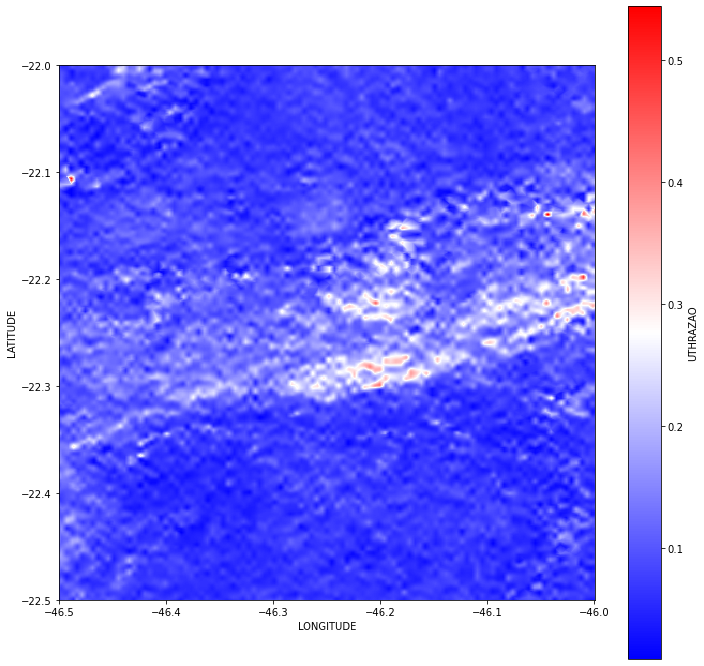

In [12]:
ds.UTHRAZAO.plot(figsize=(12,12),cmap='bwr')
plt.axis('scaled')

In [25]:
ds

<xarray.Dataset>
Dimensions:    (LATITUDE: 500, LONGITUDE: 500)
Coordinates:
  * LATITUDE   (LATITUDE) float64 -22.5 -22.5 -22.5 -22.5 ... -22.0 -22.0 -22.0
  * LONGITUDE  (LONGITUDE) float64 -46.5 -46.5 -46.5 -46.5 ... -46.0 -46.0 -46.0
Data variables:
    MDT        (LATITUDE, LONGITUDE) float64 797.6 798.2 ... 1.367e+03 1.364e+03
    CTCOR      (LATITUDE, LONGITUDE) float64 4.087 3.236 2.808 ... 11.23 9.788
    KPERC      (LATITUDE, LONGITUDE) float64 0.5868 0.5393 ... 0.2087 0.1634
    eU         (LATITUDE, LONGITUDE) float64 0.8299 0.7282 ... 2.073 1.954
    eTh        (LATITUDE, LONGITUDE) float64 14.08 11.9 10.38 ... 34.47 30.65
    GMT        (LATITUDE, LONGITUDE) float64 194.9 200.4 206.4 ... -14.31 -12.03
    UTHRAZAO   (LATITUDE, LONGITUDE) float64 0.07752 0.08698 ... 0.07816 0.07725
    UKRAZAO    (LATITUDE, LONGITUDE) float64 1.902 2.096 2.232 ... 15.1 15.24
    THKRAZAO   (LATITUDE, LONGITUDE) float64 25.1 24.42 23.68 ... 193.0 197.1

In [28]:
da = ds.MDT

In [32]:
da

<xarray.DataArray 'MDT' (LATITUDE: 500, LONGITUDE: 500)>
array([[ 797.63504726,  798.18255269,  798.24442157, ...,  872.51092109,
         875.68070751,  878.85049393],
       [ 787.26120003,  788.63486049,  790.84739474, ...,  885.46976053,
         885.9934802 ,  886.44600461],
       [ 777.78174327,  778.54646674,  781.42964436, ...,  903.51303558,
         901.46111194,  899.37308236],
       ...,
       [1323.48661575, 1327.56939884, 1331.65218194, ..., 1362.48464335,
        1364.92293448, 1367.10700805],
       [1320.72690171, 1324.06063692, 1327.39441628, ..., 1365.34557038,
        1361.84110749, 1358.99256436],
       [1318.13808612, 1321.05452703, 1323.96532184, ..., 1370.98642361,
        1367.16248783, 1363.69550371]])
Coordinates:
  * LATITUDE   (LATITUDE) float64 -22.5 -22.5 -22.5 -22.5 ... -22.0 -22.0 -22.0
  * LONGITUDE  (LONGITUDE) float64 -46.5 -46.5 -46.5 -46.5 ... -46.0 -46.0 -46.0

(-46.50050100200401,
 -45.99949899799652,
 -22.500501002004007,
 -21.99949899799652)

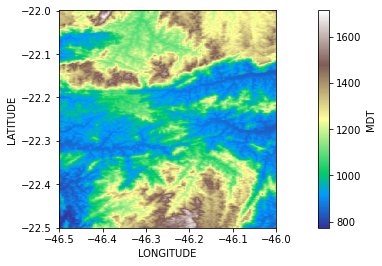

In [43]:
da.plot(cmap='terrain')
plt.axis('scaled')